# **토픽 모델링 과제**

In [70]:
# 라이브러리 설치
!pip install numpy==1.23.5 --force-reinstall

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.


In [71]:
!pip install --upgrade gensim
!pip install nltk

In [72]:
import pandas as pd
import json
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

In [73]:
#  TXT 파일 불러오기
with open('/content/petitions_2019-08.txt', encoding='utf-8') as f:
    lines = f.readlines()

In [74]:
# JSON 파싱 후 DataFrame으로 변환
data = [json.loads(line) for line in lines]
df = pd.DataFrame(data)

In [75]:
# NLTK 토크나이저 준비
tokenizer = RegexpTokenizer("[\w']{3,}")
english_stops = set(stopwords.words('english'))

In [76]:
def tokenize(text):
    tokens = tokenizer.tokenize(text.lower())
    return [word for word in tokens if word not in english_stops and len(word) > 2]

In [77]:
# 카테고리별 토큰화
category_to_tokenized_texts = {}
for category in df['category'].unique():
    texts = df[df['category'] == category]['content'].dropna().tolist()
    tokenized = [tokenize(text) for text in texts]
    tokenized = [t for t in tokenized if len(t) > 0]  # 빈 문서 제거
    category_to_tokenized_texts[category] = tokenized


In [78]:
# 카테고리별 LDA 모델 학습 및 주제 출력
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary

for cat, texts in category_to_tokenized_texts.items():
    print(f"\n'{cat}'은(는) 주제가")  # 카테고리 이름 출력

    dictionary = Dictionary(texts)
    dictionary.filter_extremes(keep_n=3000, no_below=2, no_above=0.7)
    corpus = [dictionary.doc2bow(text) for text in texts]

    if len(dictionary) == 0:
        print("유효한 단어 부족")
        continue

    model = LdaModel(corpus=corpus, id2word=dictionary,
                     passes=10, num_topics=1, random_state=7)

    topic_words = model.show_topic(0, topn=20)  # topic 20개
    words_only = [word for word, _ in topic_words]
    print(", ".join(words_only))




'반려동물'은(는) 주제가
있습니다, 합니다, 생명을, 했습니다, 강력한, 없습니다, 그리고, 반려동물, 강아지를, 이렇게, 어떻게, 동물이, 고양이, 주십시오, 안됩니다, 돌아오는, 부탁드립니다, 도와주세요, 강아지, 키우는

'경제민주화'은(는) 주제가
있습니다, 공매도, 합니다, 대한민국, 주식을, 시스템을, 공매도를, 없습니다, 있는데, 그리고, 공매도는, 그러나, 이렇게, 어떻게, 내용이, 것입니다, 정부의, 그런데, 됩니다, 공정한

'교통/건축/국토'은(는) 주제가
합니다, 분양가, 것입니다, 아파트, 없습니다, 내용이, 하지만, 재건축, 그리고, 이렇게, 게시물의, 요건에, 관리자에, 수정되었습니다, 위배되어, 신도시, 바랍니다, 국민의, 2019, 이러한

'행정'은(는) 주제가
있습니다, 합니다, 입니다, 대한민국, 내용이, 게시물의, 관리자에, 수정되었습니다, 위배되어, 요건에, 그리고, 그런데, 되었습니다, 것입니다, 2019년, 2019, 하지만, 사람이, 아니라, 국민의

'정치개혁'은(는) 주제가
있습니다, 문재인, 합니다, 그리고, 대한민국, 국민의, 것입니다, 국회에서, 공수처, 하지만, 생각합니다, 내용이, 대한민국에, 바랍니다, 게시물의, 청문회, 수정되었습니다, 요건에, 관리자에, 위배되어

'기타'은(는) 주제가
있습니다, 합니다, 그리고, 했습니다, 하지만, 이렇게, 내용이, 것입니다, 요건에, 수정되었습니다, 게시물의, 위배되어, 관리자에, 어떻게, 되었습니다, 하였습니다, 그러나, 전화를, 입니다, 없습니다

'문화/예술/체육/언론'은(는) 주제가
있습니다, 합니다, 생각합니다, 게시물의, 내용이, 요건에, 관리자에, 수정되었습니다, 위배되어, 것입니다, 그리고, 대한민국, 하지만, 없습니다, 2019년, 했습니다, 경기를, 이러한, 상황을, 되었습니다

'보건복지'은(는) 주제가
합니다, 그리고, 입니다, 것입니다, 없습니다, 때문에, 했습니다, 전화를, 어떻게, 하지만, 이렇게, 되었습니다, 않습니다, 그런데, 

In [81]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline

def show_coherence(texts, start=6, end=15, passes=5):
    iter_num = []
    coh_value = []

    for num_topics in range(start, end + 1):
        dictionary = Dictionary(texts)
        dictionary.filter_extremes(keep_n=3000, no_below=2, no_above=0.7)
        corpus = [dictionary.doc2bow(text) for text in texts]

        if len(dictionary) == 0 or len(corpus) == 0:
            print(f"토픽 {num_topics}: 유효한 사전/코퍼스 없음")
            continue

        lda = LdaModel(corpus=corpus, id2word=dictionary,
                       passes=passes, num_topics=num_topics, random_state=7)

        cm = CoherenceModel(model=lda, texts=texts,
                            dictionary=dictionary, coherence='c_v')
        coherence = cm.get_coherence()
        iter_num.append(num_topics)
        coh_value.append(coherence)

        print(f"num_topics: {num_topics}, coherence: {coherence:.4f}")

    # 그래프 출력
    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence Score")
    plt.title("Topic Coherence by Number of Topics")
    plt.show()

    # 최고 coherence를 준 토픽 수 반환
    if coh_value:
        best_num = iter_num[coh_value.index(max(coh_value))]
        print(f"최적 토픽 수: {best_num}")
        return best_num
    else:
        print("유효한 coherence 계산 불가")
        return None


num_topics: 6, coherence: 0.3179


num_topics: 7, coherence: 0.3560


num_topics: 8, coherence: 0.3551


num_topics: 9, coherence: 0.3687


num_topics: 10, coherence: 0.3712


num_topics: 11, coherence: 0.4024


num_topics: 12, coherence: 0.3926


num_topics: 13, coherence: 0.4140


num_topics: 14, coherence: 0.3876
num_topics: 15, coherence: 0.3754


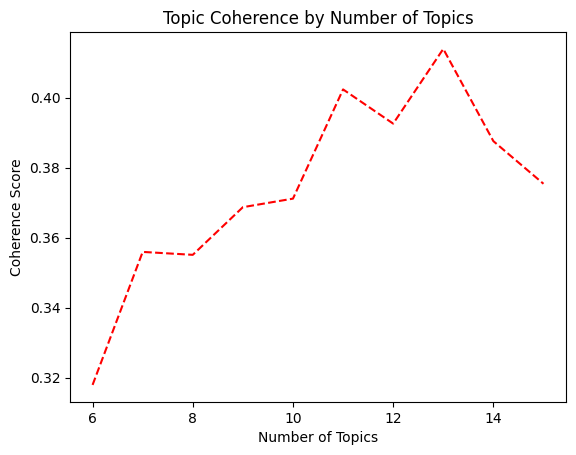

최적 토픽 수: 13


In [82]:
# '문화/예술/체육/언론' 카테고리의 응집도 확인
texts = category_to_tokenized_texts["문화/예술/체육/언론"]
best_topic_num = show_coherence(texts, start=6, end=15)